<a href="https://colab.research.google.com/github/sanchitkalra/bits-f312-nnfl/blob/main/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

In [ ]:
pip install openpyxl==3.0.9

In each of the following functions, linear regression without regularisation is run by setting lamb = 0

For Ridge Regression, the flag l2 is set to True and for Least Angle Regression the flag l2 is set to False.

In [ ]:
def cost_function(X,y,w,lamb, l2 = True): # define cost function
  hypothesis = np.dot(X,w.T) # calculation of hypothesis for all instances
  if l2:
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)+(lamb/2)*np.sum(w**2) # Ridge Regression
  else:
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) +(lamb/2)*np.sum(np.abs(w)) # Least Angle Regression
  return J

In [ ]:
def batch_gradient_descent(X, y, w, alpha, iters, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X, w.T)
    if l2:
      w = w*(1 - alpha*lamb) - (alpha/len(y))*np.dot(hypothesis - y, X) # Ridge Regression
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/len(y))*np.dot(hypothesis - y, X) # Least Angle Regression
    cost_history[i] = cost_function(X, y, w, lamb)
  return w, cost_history

In [ ]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    if l2:
      w = w*(1 - alpha*lamb) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Ridge Regression
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Least Angle Regression
    cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
  return w, cost_history

In [ ]:
def stochastic_gradient_descent(X,y,w,alpha, iters, lamb, l2 = True):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    if l2:
      w = w*(1 - alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Ridge Regression
    else:
      w = w - ((alpha*lamb)/2)*np.sign(w) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y)) # Least Angle Regression
    cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
  return w, cost_history

In [ ]:
data_x_tr = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/xtr.csv',header=None)
data_y_tr = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/ytr.csv',header=None)
data_x_te = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/xte.csv',header=None)
data_y_te = pd.read_csv('/content/drive/MyDrive/NNFL/Q1_Q2_data/yte.csv',header=None)
print(data_y_te)

      0
0  1.36
1  1.36
2  1.36
3  1.36
4  1.36
5  1.43
6  1.43
7  1.43
8  1.43
9  1.43


In [ ]:
#datan = data.values
X = data_x_tr.values[:, [0, 1]]
m = X.shape[0]
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X-xmin)/(xmax - xmin)
print(X)

[[0.51322751 0.0729927 ]
 [0.51322751 0.74452555]
 [0.51322751 0.62043796]
 [0.51322751 0.        ]
 [0.51322751 0.6350365 ]
 [0.51322751 0.02919708]
 [0.51322751 0.57664234]
 [0.51322751 0.64233577]
 [0.51322751 0.11678832]
 [0.51322751 0.64963504]
 [0.51322751 0.62043796]
 [0.74603175 0.80291971]
 [0.97883598 0.43065693]
 [0.25396825 0.24817518]
 [0.02116402 0.62773723]
 [0.51322751 0.81021898]
 [0.74603175 1.        ]
 [0.97354497 0.44525547]
 [0.02116402 0.25547445]
 [0.50793651 0.64233577]
 [0.73544974 0.82481752]
 [0.97354497 1.        ]
 [0.26984127 0.45985401]
 [0.02116402 0.28467153]
 [0.51322751 0.6350365 ]
 [0.73015873 0.81021898]
 [0.96296296 1.        ]
 [0.25925926 0.45255474]
 [0.02116402 0.27007299]
 [0.51322751 0.61313869]
 [0.75661376 0.80291971]
 [0.98941799 0.98175182]
 [0.25925926 0.43065693]
 [0.         0.25182482]
 [0.51322751 0.61313869]
 [0.75132275 0.79927007]
 [0.97883598 0.97810219]
 [0.26984127 0.4379562 ]
 [0.01587302 0.25547445]
 [0.51322751 0.86131387]


In [ ]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones

In [ ]:
X.shape

(55, 3)

In [ ]:
print(X)

[[1.         0.51322751 0.0729927 ]
 [1.         0.51322751 0.74452555]
 [1.         0.51322751 0.62043796]
 [1.         0.51322751 0.        ]
 [1.         0.51322751 0.6350365 ]
 [1.         0.51322751 0.02919708]
 [1.         0.51322751 0.57664234]
 [1.         0.51322751 0.64233577]
 [1.         0.51322751 0.11678832]
 [1.         0.51322751 0.64963504]
 [1.         0.51322751 0.62043796]
 [1.         0.74603175 0.80291971]
 [1.         0.97883598 0.43065693]
 [1.         0.25396825 0.24817518]
 [1.         0.02116402 0.62773723]
 [1.         0.51322751 0.81021898]
 [1.         0.74603175 1.        ]
 [1.         0.97354497 0.44525547]
 [1.         0.02116402 0.25547445]
 [1.         0.50793651 0.64233577]
 [1.         0.73544974 0.82481752]
 [1.         0.97354497 1.        ]
 [1.         0.26984127 0.45985401]
 [1.         0.02116402 0.28467153]
 [1.         0.51322751 0.6350365 ]
 [1.         0.73015873 0.81021898]
 [1.         0.96296296 1.        ]
 [1.         0.25925926 0.45

In [ ]:
y=data_y_tr.values[:,0] #output
print(y.shape)
ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin) #Normalization
print(y)

(55,)
[0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.         0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.21428571 0.21428571 0.42857143 0.42857143 0.42857143 0.42857143
 0.42857143 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.14285714
 0.14285714 0.14285714 0.14285714 0.14285714 0.42857143 0.42857143
 0.42857143 0.42857143 0.42857143 0.28571429 0.78571429 1.
 0.64285714 0.64285714 0.89285714 1.         1.         1.
 1.         1.         0.64285714 0.64285714 0.64285714 0.64285714
 0.64285714]


In [ ]:
y_te=data_y_te.values[:,0] #output
y_te = np.array([y_te]).T
print(y_te.shape)
y_te_min = np.min(y_te, axis = 0)
y_te_max = np.max(y_te, axis = 0)
y_te = (y_te- y_te_min)/(y_te_max-y_te_min) #Normalization
#y_te = y_te/y_te_max
print(y_te)

(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
w= np.zeros(X.shape[1])

In [ ]:
print(w)

[0. 0. 0.]


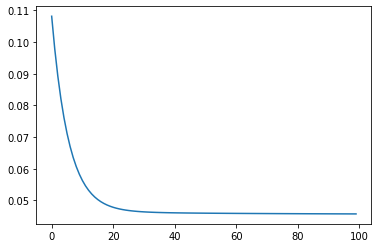

In [ ]:
alpha=0.05 ##learning rate
iters=100 ###iterations
lamb=0.1
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his)
plt.show()

In [ ]:
print(batch_w)

[0.25907272 0.07766922 0.12357418]


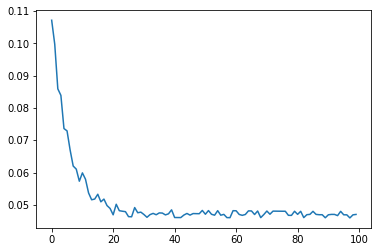

[0.25101819 0.08166399 0.1240634 ]


In [ ]:
batch_size = 50
w= np.zeros(X.shape[1])
mb_w, J_his_mb = MB_gradient_descent(X, y, w, alpha, iters, batch_size, lamb)

plt.plot(range(iters),J_his_mb)
plt.show()

print(mb_w)

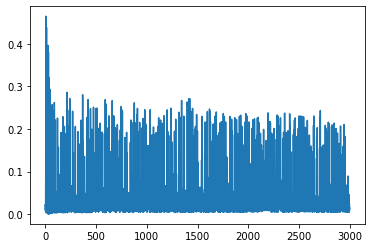

[0.2523471  0.0408007  0.11516784]


In [ ]:
w= np.zeros(X.shape[1])
iters = 3000
alpha = 0.01
sg_w, J_his_sg = stochastic_gradient_descent(X,y,w,alpha, iters, lamb)

plt.plot(range(iters),J_his_sg)
plt.show()

print(sg_w)

In [ ]:
X_test = data_x_te.values[:, [0, 1]]
m = X_test.shape[0]
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test-xmin)/(xmax - xmin)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of ones
#print(X_test)

y_test=data_y_te.values[:,0] #output
ymin = np.min(y_test, axis = 0)
ymax = np.max(y_test, axis = 0)
y_test = (y_test- ymin)/(ymax-ymin) #Normalization
#print(y_test)

y_batch_pred = np.dot(X_test, batch_w)
y_mb_pred = np.dot(X_test, mb_w)
y_sg_pred = np.dot(X_test, sg_w)

#print(y_batch_pred)

In [ ]:
def meanSquareError(Y_pred, Y_test):
  mse = np.sum(np.square(Y_pred - Y_test).mean(axis = 0))
  return mse

In [ ]:
def meanAbsoluteError(Y_pred, Y_test):
  mae = np.sum(np.abs(Y_pred - Y_test).mean(axis = 0))
  return mae

In [ ]:
def CC(Y, _Y):
        diffY = Y - (np.mean(Y, axis=0) * np.ones(Y.shape))
        diff_Y = _Y - (np.mean(_Y, axis=0) * np.ones(_Y.shape))
        
        #print(diffY)
                
        num = np.dot(diffY.transpose(), diff_Y)
        deno = np.sqrt(np.dot(diffY.transpose(), diffY)[0])*np.sqrt(np.dot(diff_Y.transpose(), diff_Y)[0])
        return num/deno

In [ ]:
print("Batch: MSE " + str(meanSquareError(y_batch_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_batch_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_batch_pred]).T)[0][0]))
print("MB: MSE " + str(meanSquareError(y_mb_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_mb_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_mb_pred]).T)[0][0]))
print("SG: MSE " + str(meanSquareError(y_sg_pred, y_test)) + " and MAE " + str(meanAbsoluteError(y_sg_pred, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([y_sg_pred]).T)[0][0]))

Batch: MSE 0.27489462696092165 and MAE 0.5004957610083197 CC: -0.007001690406414636
MB: MSE 0.2767809418380055 and MAE 0.5005212595411057 CC: -0.007202333018145684
SG: MSE 0.28187745362706185 and MAE 0.5002604300039304 CC: -0.004738429594583097


In [ ]:
X_test = data_x_te.values[:, [0, 1]]
m = X_test.shape[0]
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test-xmin)/(xmax - xmin)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of ones

#print(X_test)

y_test=data_y_te.values[:,0] #output
ymin = np.min(y_test, axis = 0)
ymax = np.max(y_test, axis = 0)
y_test = (y_test- ymin)/(ymax-ymin) #Normalization
#print(y_test)

def make_pred(w):
  y_pred = np.dot(X_test, w)
  return y_pred
#print(y_batch_pred)

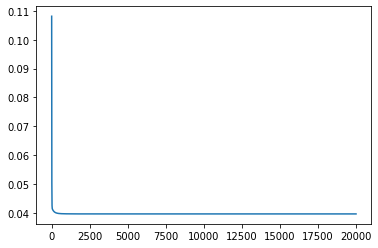

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241526119770886 and MAE 0.4992600413530311 CC: 0.037558265358171965


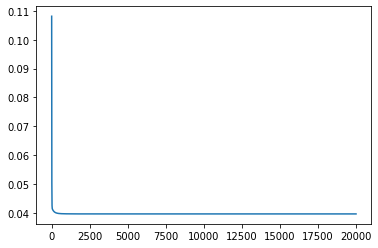

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241526119770886 and MAE 0.4992600413530311 CC: 0.037558265358171965


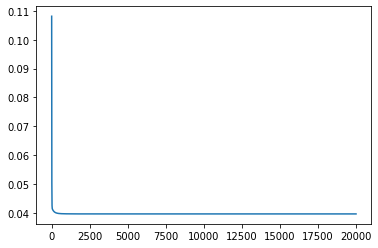

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241526119770886 and MAE 0.4992600413530311 CC: 0.037558265358171965


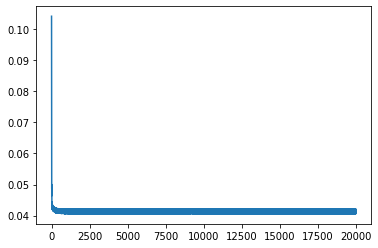

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2649370598758268 and MAE 0.49944252303417525 CC: 0.023019578934412026


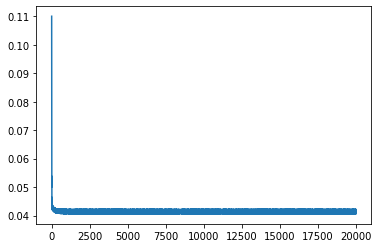

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2643310669138202 and MAE 0.49944437364981303 CC: 0.022270692761893574


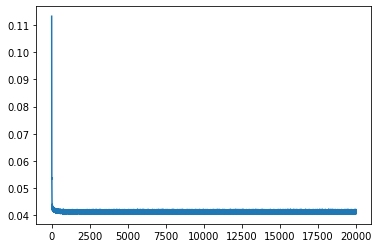

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26511562179675574 and MAE 0.4994389582284754 CC: 0.023318589156534536


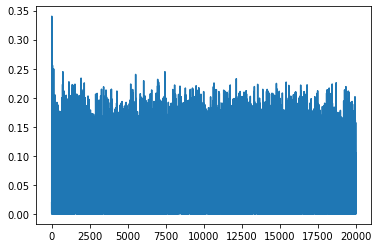

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2887037173229419 and MAE 0.4990751736797637 CC: 0.2107807252458386


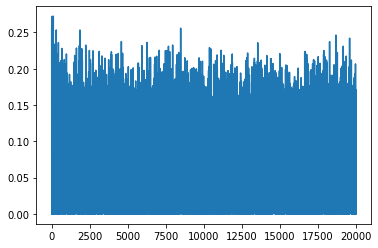

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25612377492632554 and MAE 0.49972291647360445 CC: 0.0069350114040084895


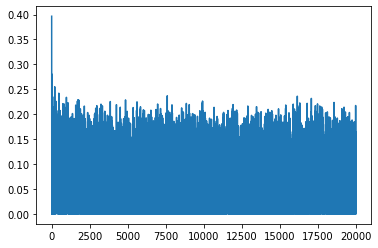

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25476531181005024 and MAE 0.49958988320784775 CC: 0.008658897190872835


In [ ]:
# Running all possible combinations

# checking for all combinations of both normals and algos

alpha=0.05 ## learning rate
iters=20000 ## iterations
lamb=0.1 ## regularisation param
batch_size = 50

# X,y,w,alpha, iters, batch_size, lamb, l2 = True

for algorithm in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
  for j in range(3): # 3 kinds of regularisation
    if j == 0: ## no regularisation
      lamb = 0
      if algorithm == MB_gradient_descent:
        calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb)
      else:
        calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
    elif j == 1: ## l2 reg
      if algorithm == MB_gradient_descent:
        calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = True)
      else:
        calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = True)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
    else:
      if algorithm == MB_gradient_descent:
        calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = False)
      else:
        calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = False)
      plt.plot(range(iters),J_his)
      plt.show()
      pr = make_pred(calc_w)
      print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))


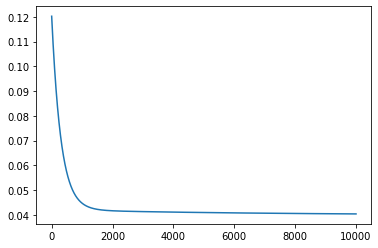

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


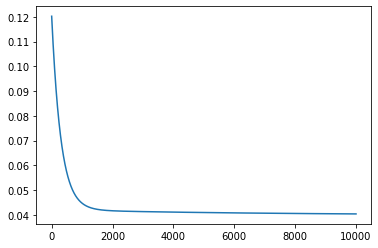

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


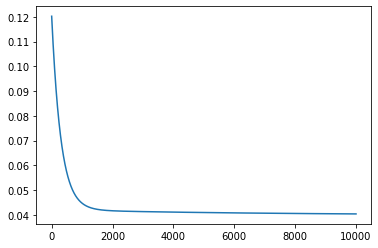

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


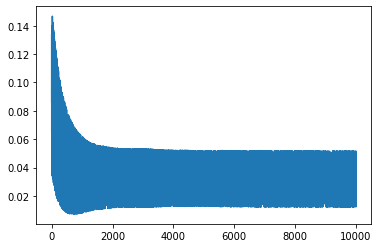

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2775107978235374 and MAE 0.5002255883320396 CC: -0.004583698643900908


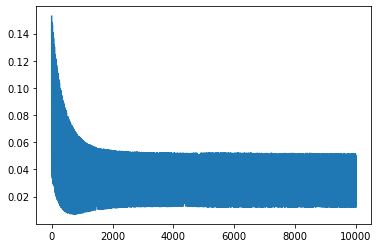

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2775056208520967 and MAE 0.5002261919700995 CC: -0.004597282324631569


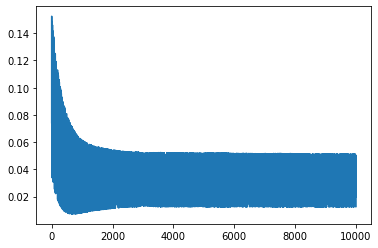

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27639347674516507 and MAE 0.500233397176188 CC: -0.004666243385226304


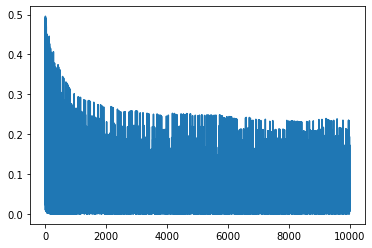

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.27061899576890325 and MAE 0.500273965811565 CC: -0.004816252232211525


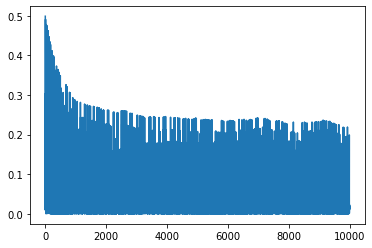

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2659382460532699 and MAE 0.5002741871354917 CC: -0.00457204431030174


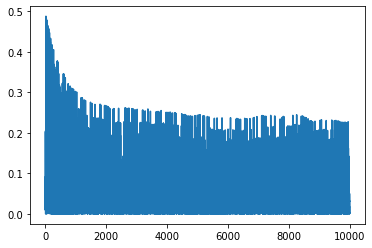

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26893227985442236 and MAE 0.5002830282398654 CC: -0.00474466561565704


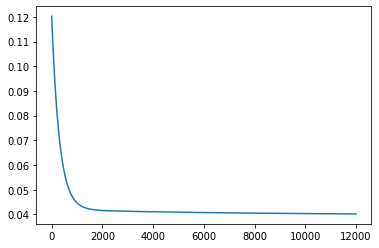

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


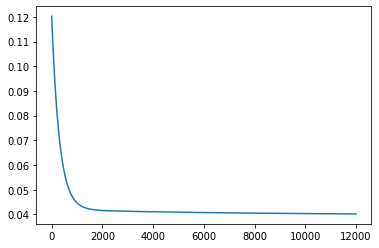

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


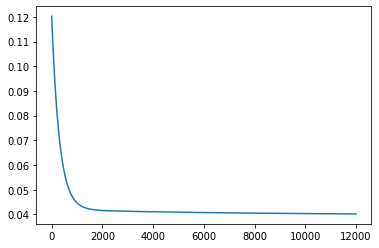

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


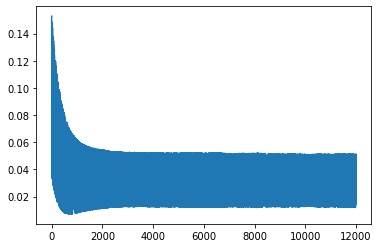

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2770233442105433 and MAE 0.5001597351251578 CC: -0.003603652091866993


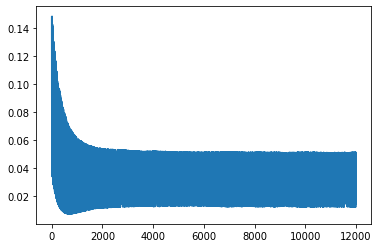

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2769022022185298 and MAE 0.5001595774867547 CC: -0.0036096540925107893


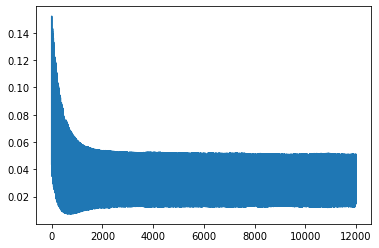

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27594322619257383 and MAE 0.5001652792699987 CC: -0.003674986980113754


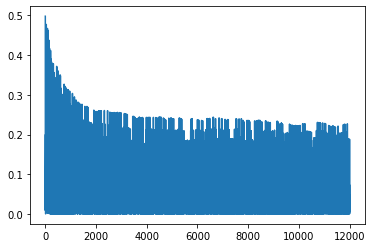

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2686450543739797 and MAE 0.5001844185697452 CC: -0.0034691120884838725


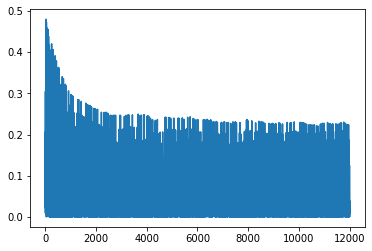

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26797196390747435 and MAE 0.5001858997629638 CC: -0.003470032174209549


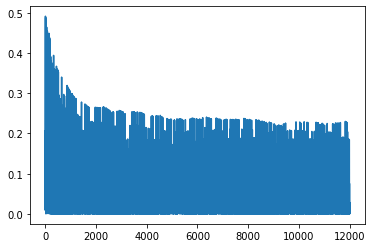

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26802344411635476 and MAE 0.5002088339743578 CC: -0.0038093009372359137


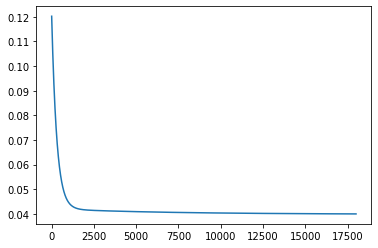

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


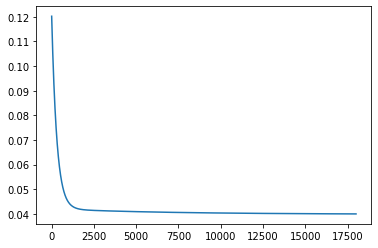

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


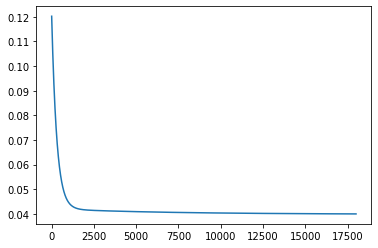

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


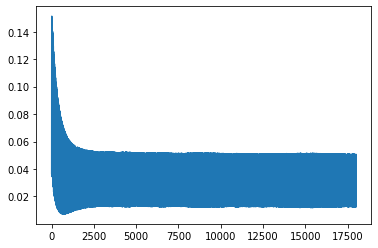

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2743411142016461 and MAE 0.500021645919501 CC: -0.0006182810330980042


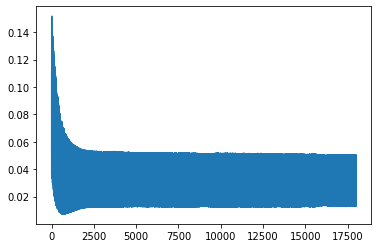

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27314443053816884 and MAE 0.5000295108102418 CC: -0.000820403847748057


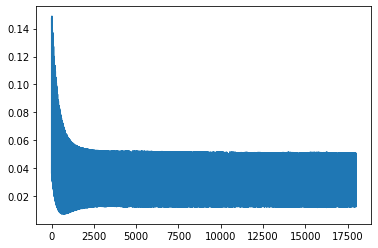

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27423773405019747 and MAE 0.500021571175296 CC: -0.0006113568003075087


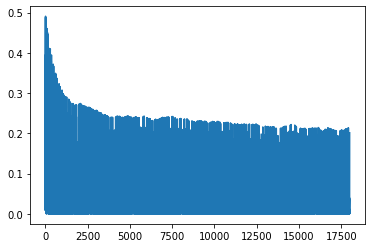

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26723490706355213 and MAE 0.49996637040948944 CC: 0.0008846699898329128


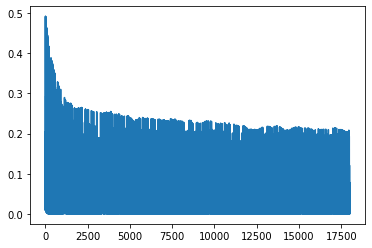

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26445500934119914 and MAE 0.49998710598327334 CC: 0.0003158915452003523


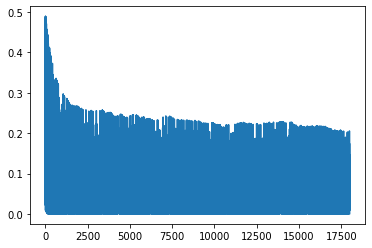

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2628523696855761 and MAE 0.5000422012277601 CC: -0.0009145431696383047


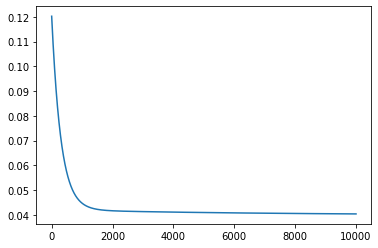

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


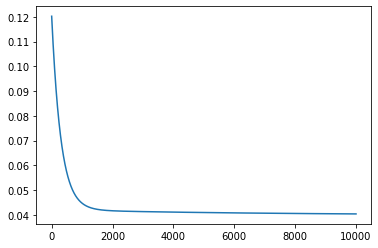

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


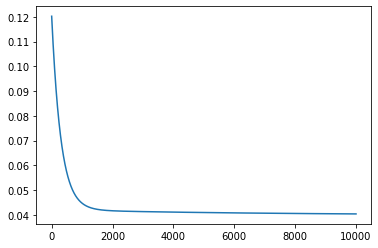

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


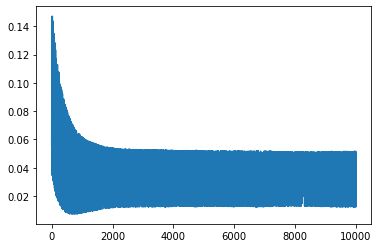

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27739793573101307 and MAE 0.5002248419332352 CC: -0.004585693831492306


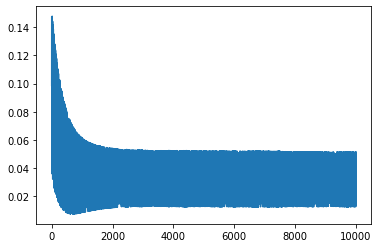

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.276870710973001 and MAE 0.5002303816226691 CC: -0.004634570477351488


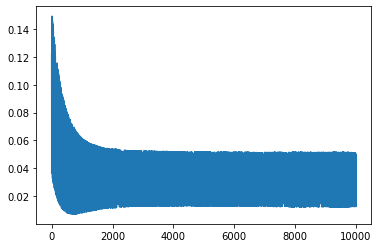

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2764708033216706 and MAE 0.5002319928265496 CC: -0.004661594100579321


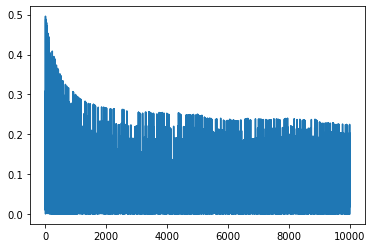

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2673831330053301 and MAE 0.5002476817553377 CC: -0.00439657156881116


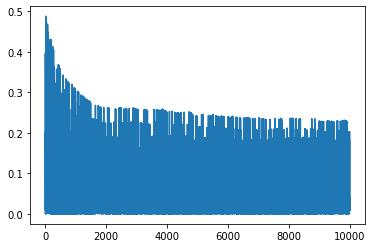

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26719733892948216 and MAE 0.5003200236342304 CC: -0.005069724758760293


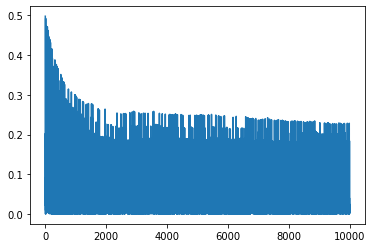

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2676709369862793 and MAE 0.5003290347167908 CC: -0.005191141005173603


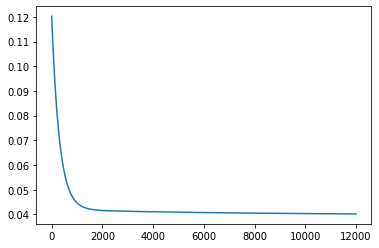

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


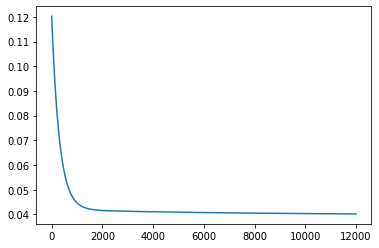

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


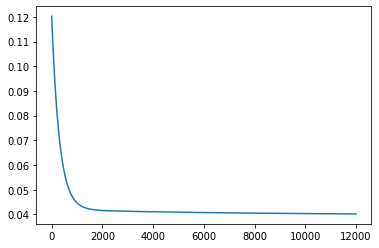

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


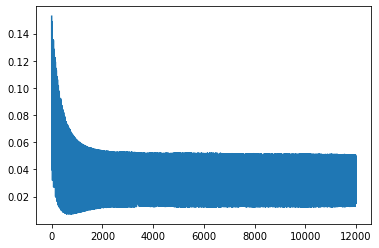

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2748166519706424 and MAE 0.500173948874652 CC: -0.0037877372412945904


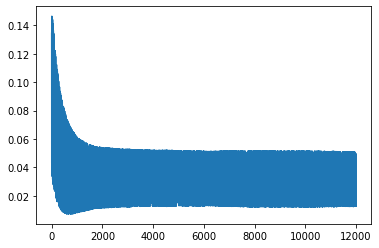

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2756018245709614 and MAE 0.5001671877402308 CC: -0.003694571520898963


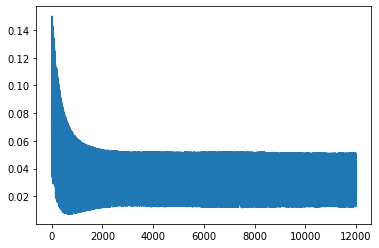

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2758395679945905 and MAE 0.5001682360718427 CC: -0.0037128985667465204


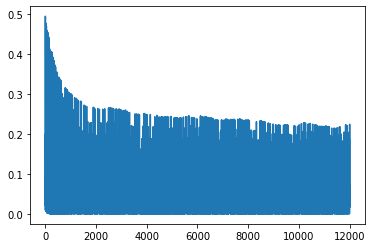

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26827121380828 and MAE 0.5001791965452498 CC: -0.003456309208131358


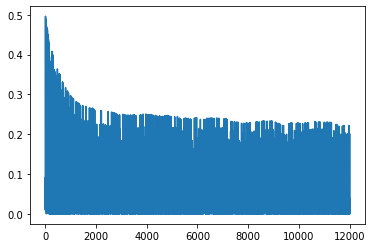

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26655858530195686 and MAE 0.5002055533830821 CC: -0.0038412205804365038


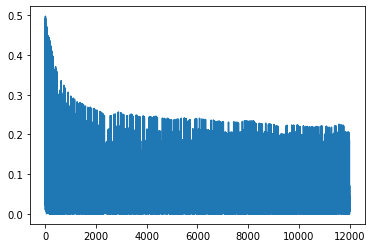

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2672328141843978 and MAE 0.5001492641091838 CC: -0.003054549162930471


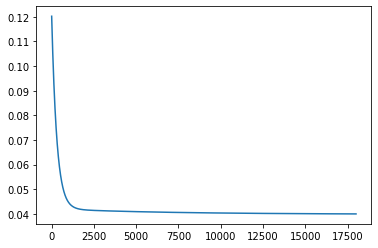

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


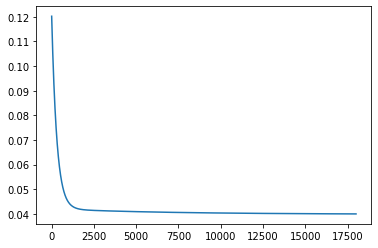

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


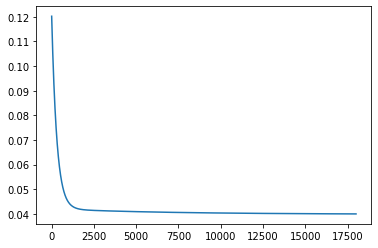

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


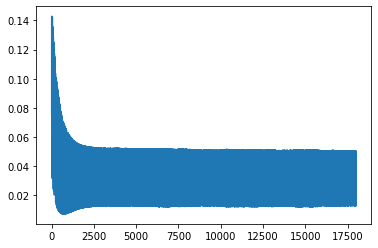

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27354888352841933 and MAE 0.5000275569653494 CC: -0.0007728555216457125


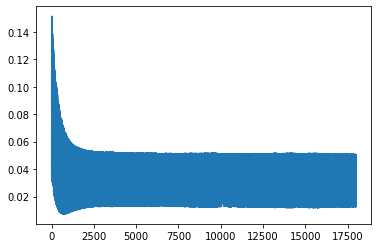

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2742734466335356 and MAE 0.5000221820527964 CC: -0.0006314554613202756


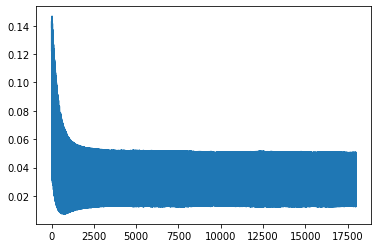

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27420027120569496 and MAE 0.5000214253388992 CC: -0.0006106569484793328


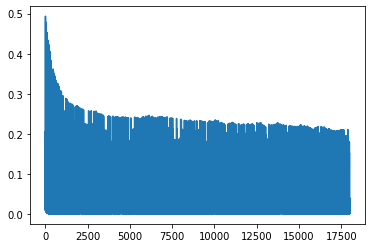

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2650860091529332 and MAE 0.5000234115933095 CC: -0.0005136462098136465


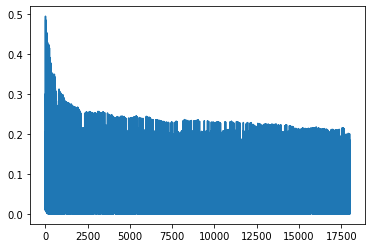

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26662658459104543 and MAE 0.5000523364726925 CC: -0.0011565703058029877


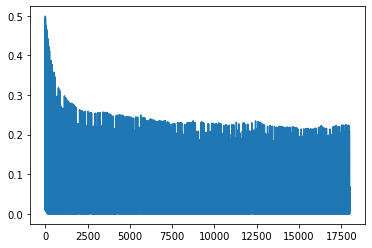

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.27105605646889275 and MAE 0.4999870344333739 CC: 0.00032332649281128877


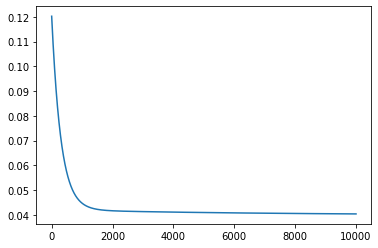

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


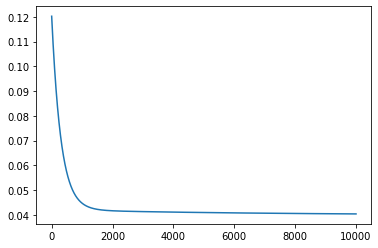

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


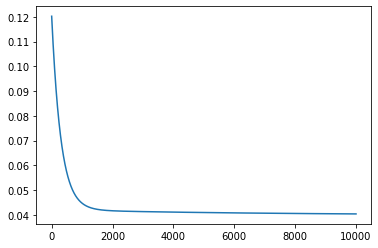

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26585526885538424 and MAE 0.5001998486030287 CC: -0.0037811225256499594


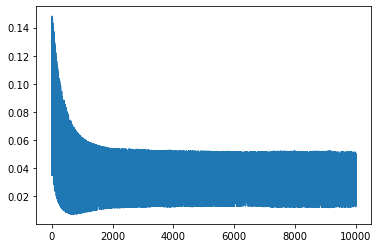

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2767570756281776 and MAE 0.5002306167834332 CC: -0.0046355384319384935


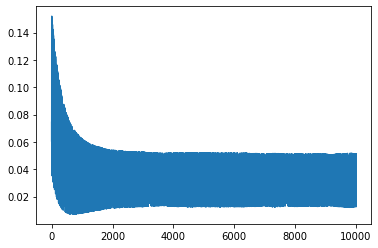

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2767841090282342 and MAE 0.5002294457256907 CC: -0.004642465756003753


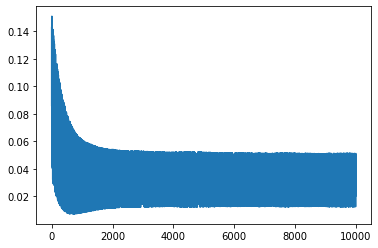

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2765667973603772 and MAE 0.5002310839138183 CC: -0.004647618706225227


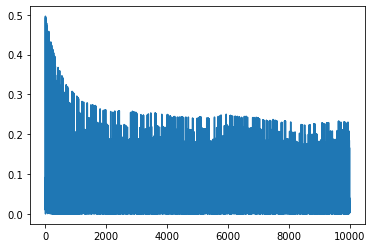

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2677292748461863 and MAE 0.5002808564799816 CC: -0.0047849213266651


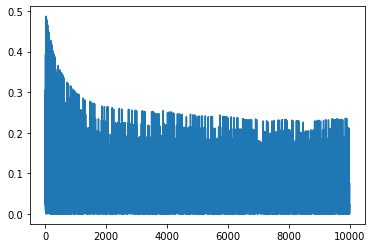

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2692699407179361 and MAE 0.5002917902600773 CC: -0.004880092527312774


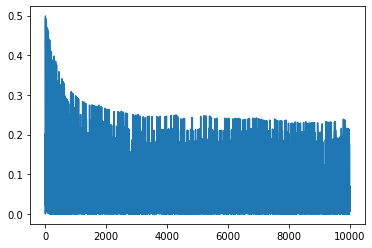

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2708581717662815 and MAE 0.5002650099912764 CC: -0.004650882338233491


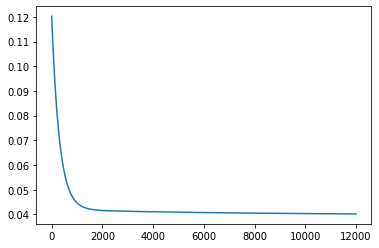

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


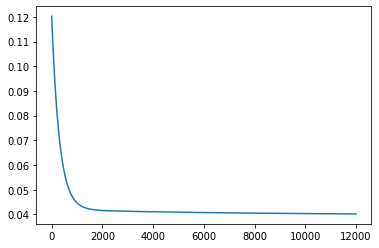

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


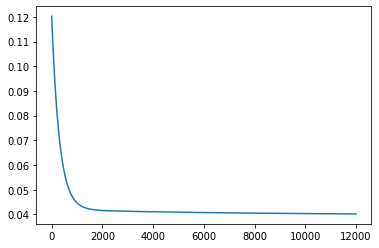

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.265026341376332 and MAE 0.500114302649814 CC: -0.002410661658299815


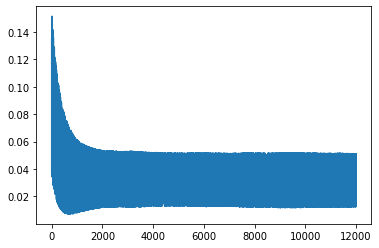

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2759621746978912 and MAE 0.5001654424437268 CC: -0.0036742967365552704


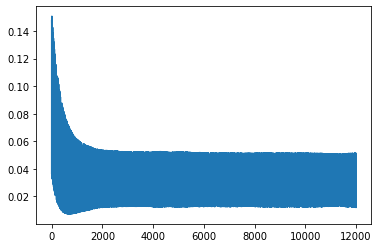

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2770761597386143 and MAE 0.5001567016978345 CC: -0.0035684914905650443


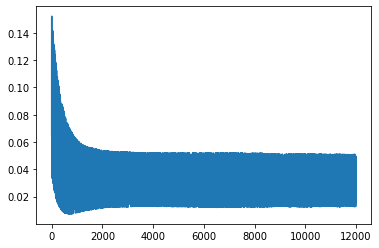

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27541276529645076 and MAE 0.5001699271177202 CC: -0.003738157340060952


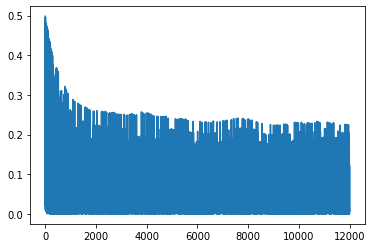

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2667721060732716 and MAE 0.5002408477625171 CC: -0.0042197943919689545


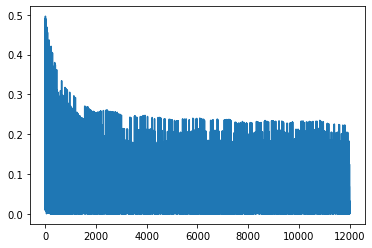

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26727084077172575 and MAE 0.5002298533651877 CC: -0.004017710400195559


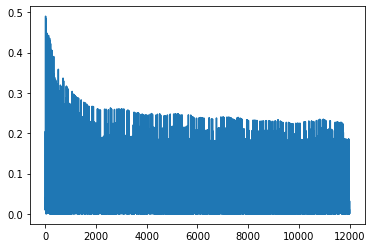

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2681870484667347 and MAE 0.5002003076923719 CC: -0.0037151914831505136


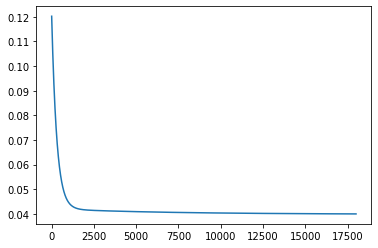

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


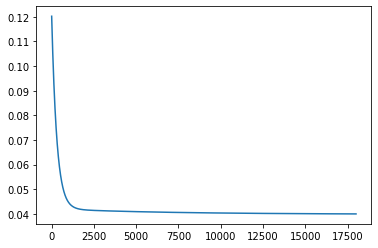

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


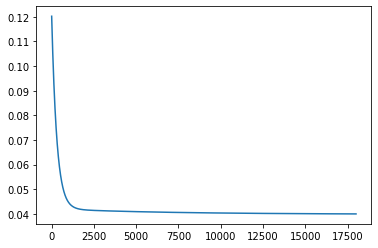

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2634551251945568 and MAE 0.49991302649648783 CC: 0.002445123804340055


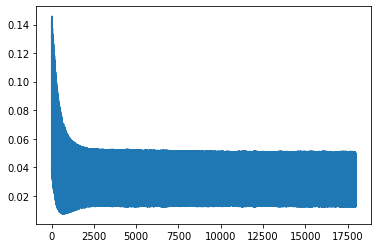

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2748422743261185 and MAE 0.5000193740823399 CC: -0.0005575846733924275


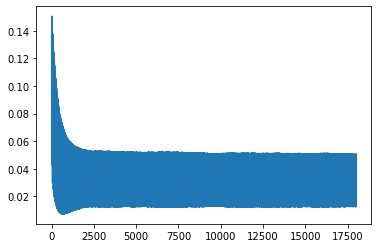

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2741686912926581 and MAE 0.5000221257086447 CC: -0.0006285133350936903


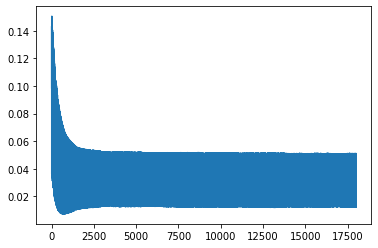

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2751613529715303 and MAE 0.5000158872584575 CC: -0.00046038176751033485


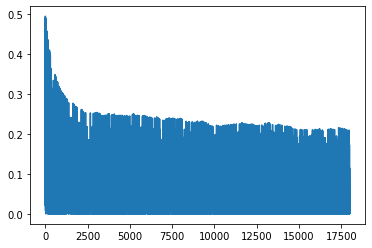

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2631005754952479 and MAE 0.5000860025895887 CC: -0.001705550313077966


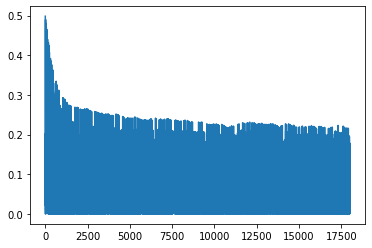

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2648977450990525 and MAE 0.5000952767501096 CC: -0.0018575215994572787


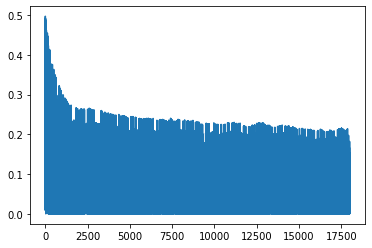

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26579280824611773 and MAE 0.500068951445664 CC: -0.001426491739369154


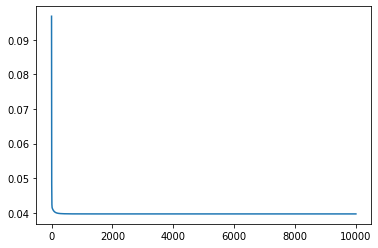

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


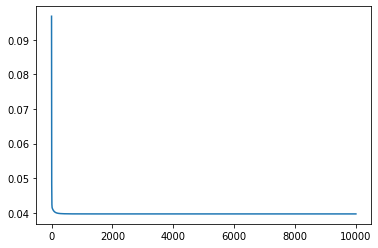

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


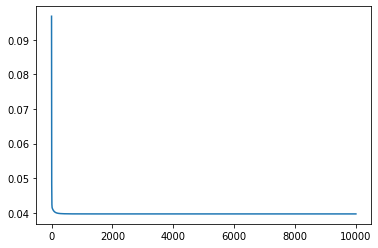

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


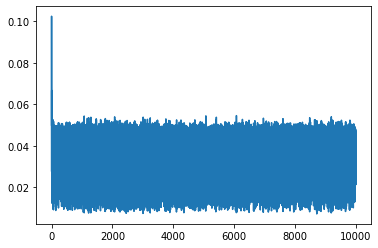

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2649700573633777 and MAE 0.4997255534183676 CC: 0.009918485528356159


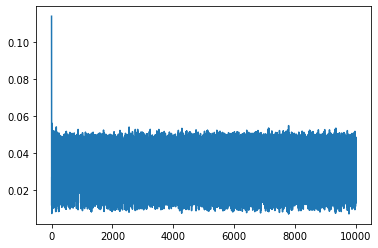

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2629582107678959 and MAE 0.4997636277788814 CC: 0.0072822539202709565


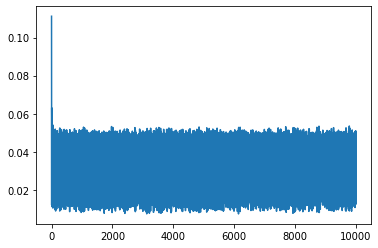

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26655305047659744 and MAE 0.49970446632899773 CC: 0.010977834481862377


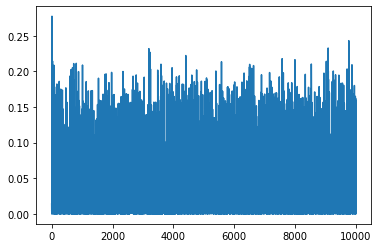

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.27376389504930554 and MAE 0.49921019335638495 CC: 0.11227022676797446


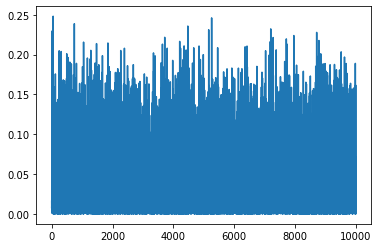

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.30491904094712713 and MAE 0.4991202732506457 CC: 0.15915805069128589


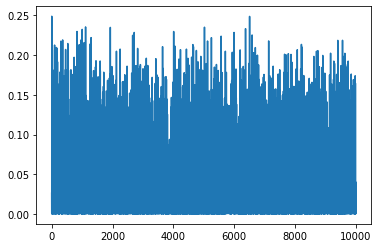

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.3143883943919499 and MAE 0.4998041741793295 CC: 0.003924510130223228


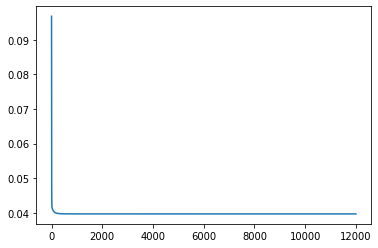

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


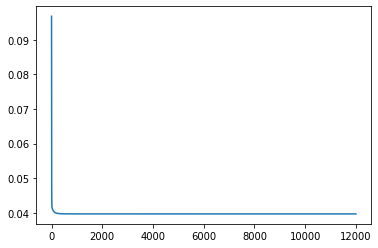

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


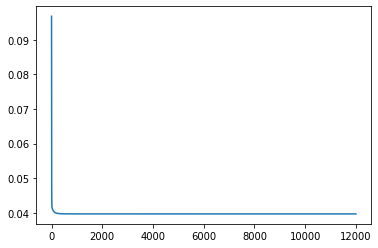

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


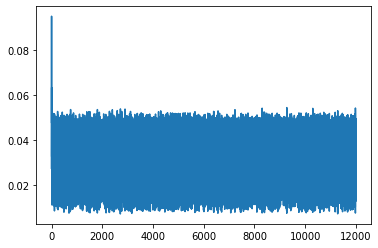

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2709472721007679 and MAE 0.4996919212072045 CC: 0.01275685468072353


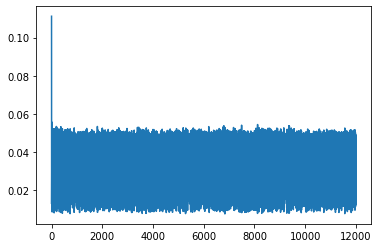

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26933137361286835 and MAE 0.4997038451138593 CC: 0.01134057152466078


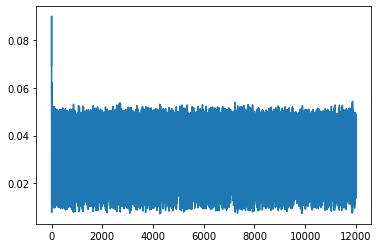

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2724254251479934 and MAE 0.4996583779684311 CC: 0.015812064615244117


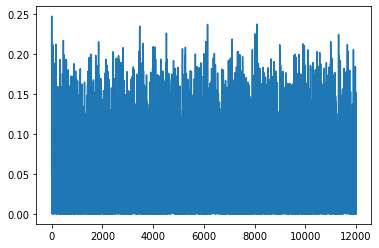

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25869224908124916 and MAE 0.49962983137327444 CC: 0.005249194577933628


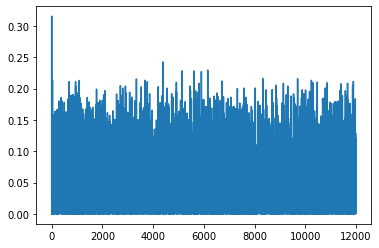

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.29155117835996397 and MAE 0.49972703541781105 CC: 0.00914795878877334


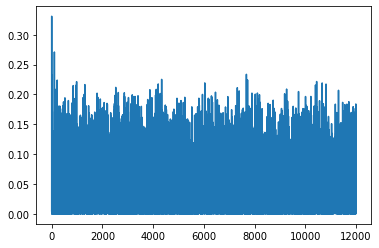

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2541501756907919 and MAE 0.49932966397862477 CC: 0.017048760931007798


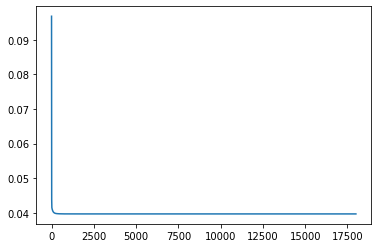

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


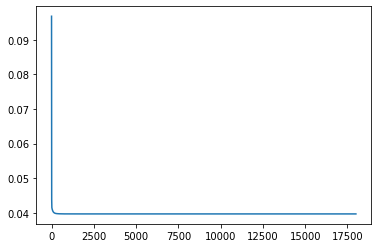

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


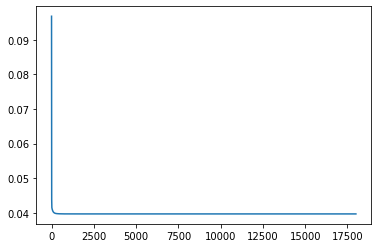

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


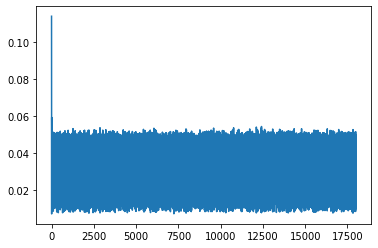

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2753691100094532 and MAE 0.4996522176097925 CC: 0.01748943024202021


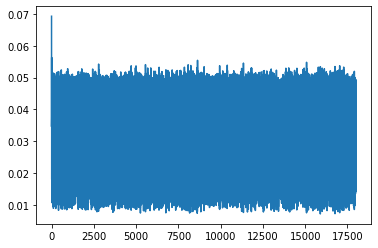

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26658986179232025 and MAE 0.4997239458889502 CC: 0.010210714397981975


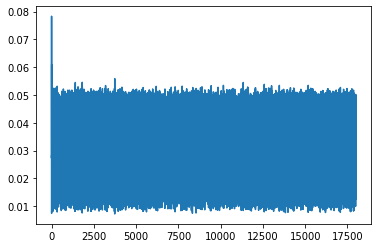

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26348119077995774 and MAE 0.49974406750067296 CC: 0.007997397706809808


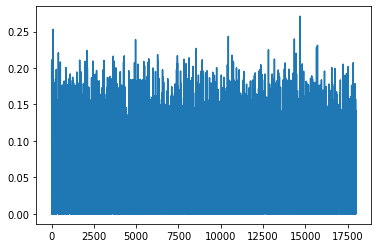

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2531721886109638 and MAE 0.49956307451274684 CC: 0.00900423439547458


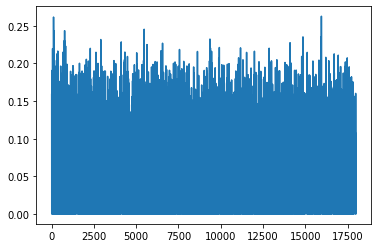

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2744095891108734 and MAE 0.4989438415336327 CC: 0.08309304981232496


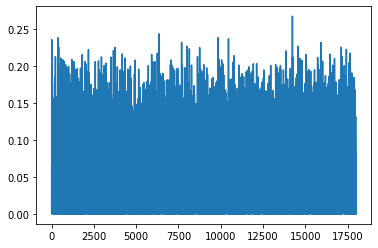

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2540042819990777 and MAE 0.49980615128765943 CC: 0.00300589385246631


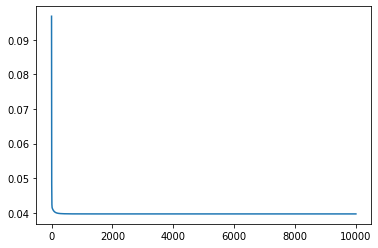

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


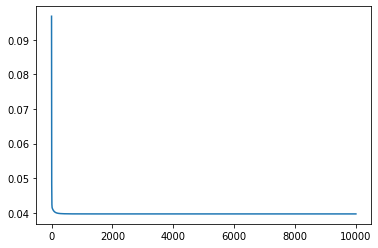

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


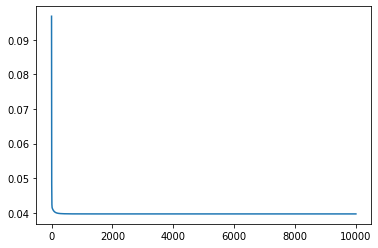

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


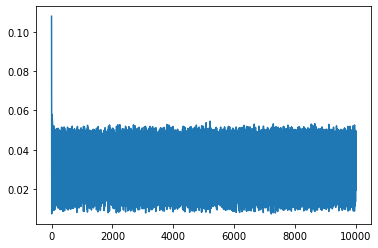

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26506873849709833 and MAE 0.4997466198439997 CC: 0.008529447397654422


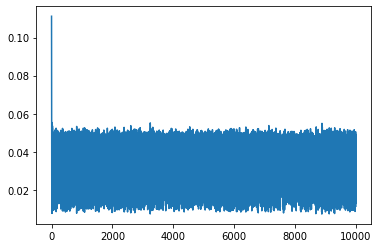

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2855867939380064 and MAE 0.4995753320679307 CC: 0.0357958113942426


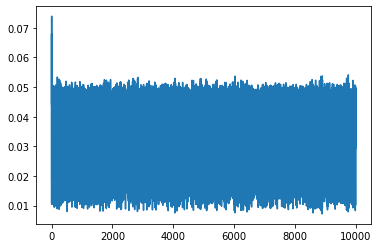

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26193948407941103 and MAE 0.49978431063747675 CC: 0.0062324582354922374


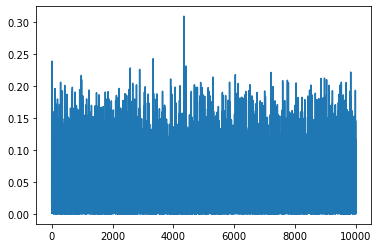

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2631476521690373 and MAE 0.5003175960419443 CC: -0.0028495247065109474


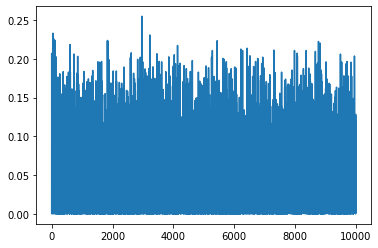

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.24972504832944137 and MAE 0.4991157049227534 CC: 0.3472379072020265


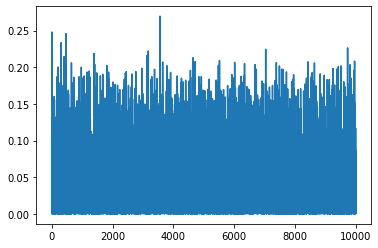

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26234846803363815 and MAE 0.49993668058077995 CC: 0.0006620070651265239


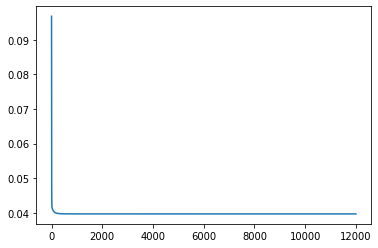

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


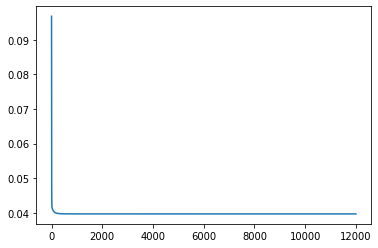

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


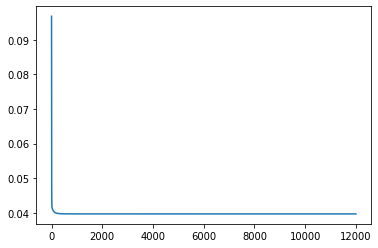

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


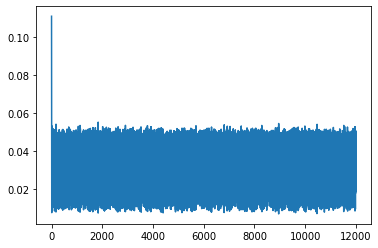

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2717018614391897 and MAE 0.4996813058081985 CC: 0.013440209506770105


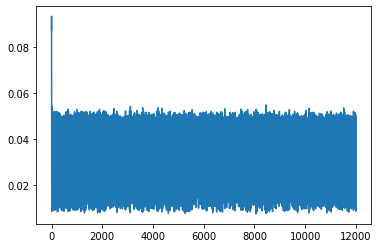

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2814997668516844 and MAE 0.4996149434707708 CC: 0.025169238393933997


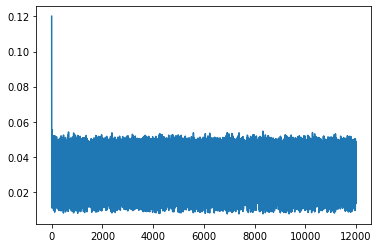

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2764760221202592 and MAE 0.49965247858110456 CC: 0.01768713965716801


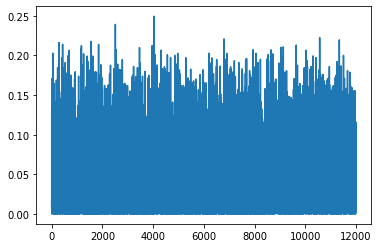

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2639446959648361 and MAE 0.4993448715889338 CC: 0.014989840815534452


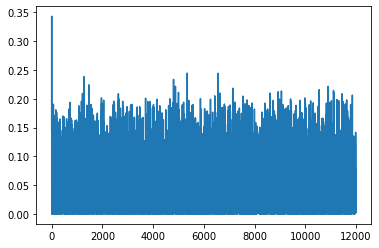

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.29443806157422825 and MAE 0.49945698001476757 CC: 0.018015010086298446


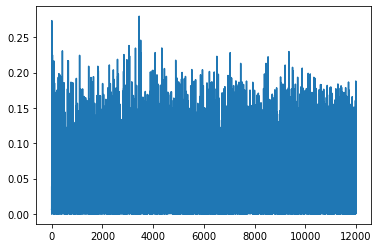

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2543394947417461 and MAE 0.499399061518249 CC: 0.01770937660027861


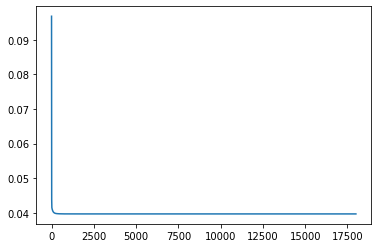

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


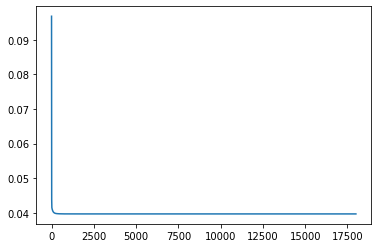

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


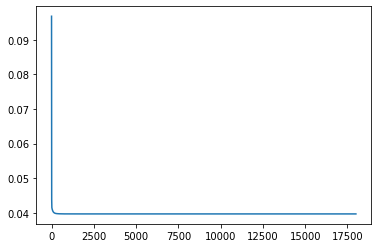

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


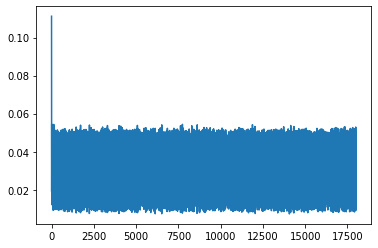

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27452210070522964 and MAE 0.49963389953812654 CC: 0.01686391511158132


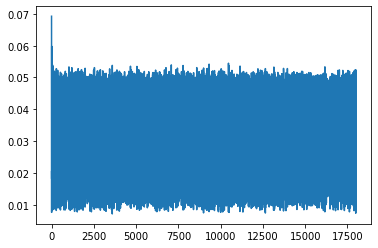

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2801061394769728 and MAE 0.49961353633515804 CC: 0.022701957721468782


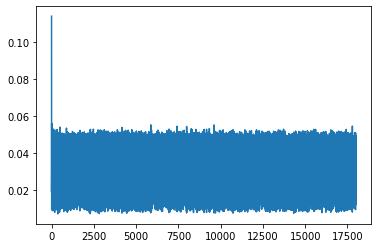

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27665100347612726 and MAE 0.4996620663911596 CC: 0.015657442694276654


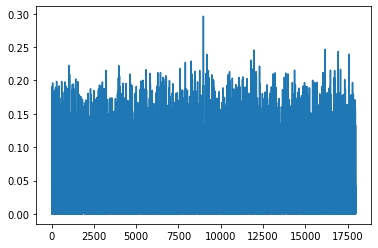

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.29343656864200973 and MAE 0.49943698630683536 CC: 0.02626756223419844


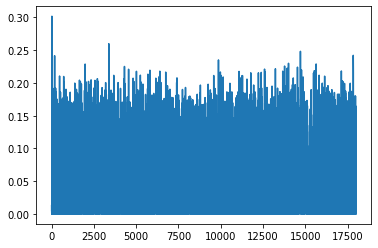

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25932176159070813 and MAE 0.4993913371693354 CC: 0.01944110336752884


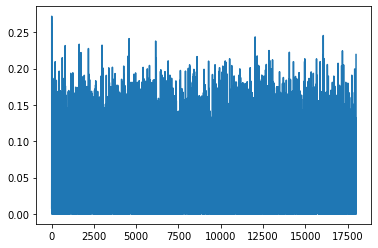

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.27585194929068546 and MAE 0.499297213021789 CC: 0.020019177752909068


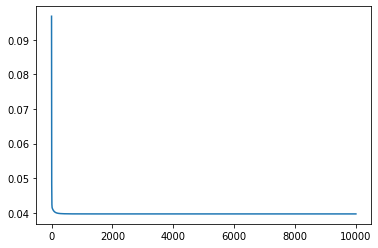

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


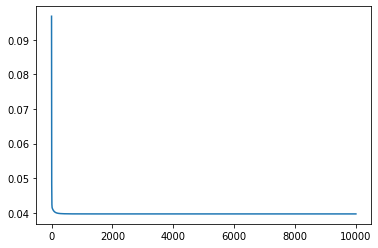

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


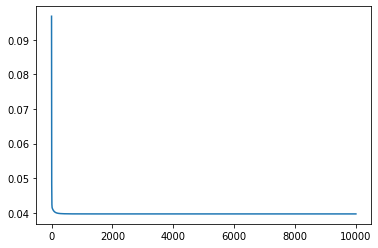

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977102 and MAE 0.49926004135303065 CC: 0.03755826535818456


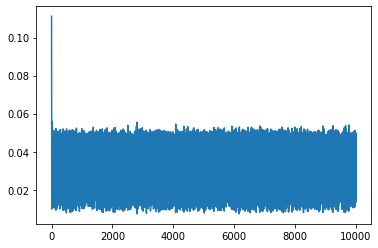

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2696003012351282 and MAE 0.4996844006010571 CC: 0.012862761904280005


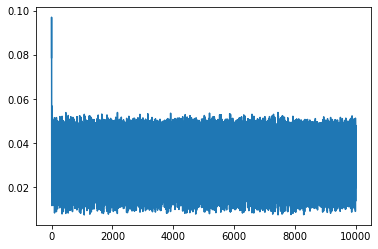

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2733317897814202 and MAE 0.4996752562603651 CC: 0.01476708066974515


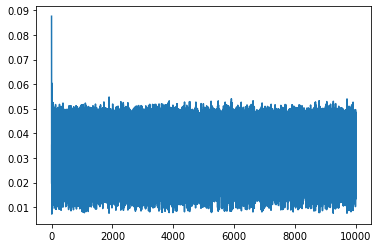

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2737818247887547 and MAE 0.4996559813268807 CC: 0.017363079510144673


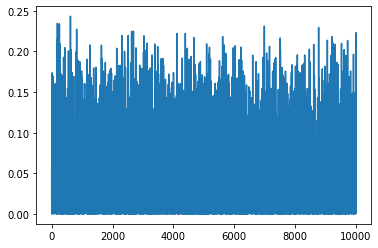

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26034347456812224 and MAE 0.4992360320695365 CC: 0.0251511280130092


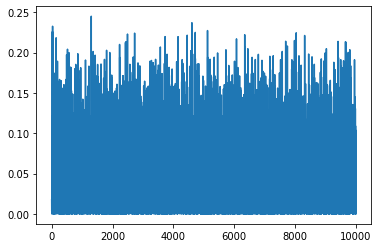

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2602704041538098 and MAE 0.49900151500498663 CC: 0.07934586952762789


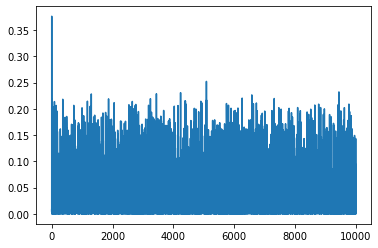

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2637374668046434 and MAE 0.4997601237774919 CC: 0.004134515562737043


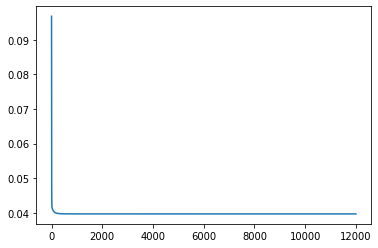

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


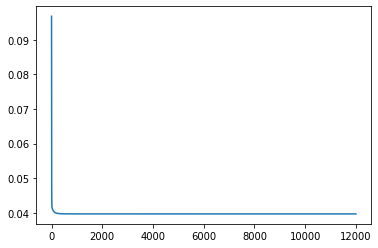

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


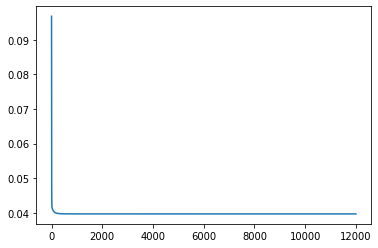

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977985 and MAE 0.49926004135300106 CC: 0.03755826535905589


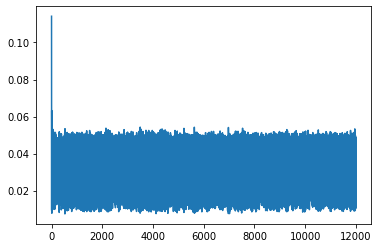

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.28527260950528793 and MAE 0.49959068439955034 CC: 0.031060029489301276


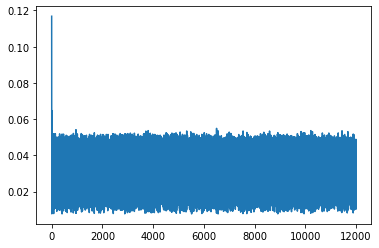

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27568141505654276 and MAE 0.49963429347991833 CC: 0.02135448948322796


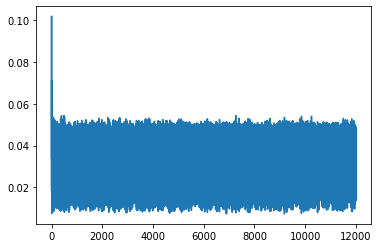

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27403556998760265 and MAE 0.4996439779754911 CC: 0.018099316562202632


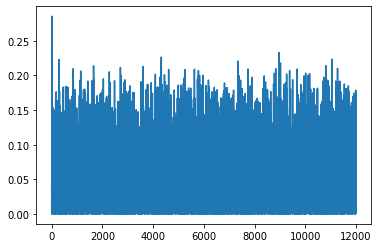

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25228598670433006 and MAE 0.49948560934809755 CC: 0.009776730372977218


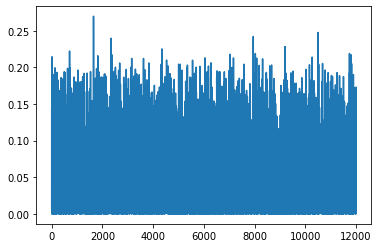

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.250372208369966 and MAE 0.49932979228394175 CC: 0.021673212919129343


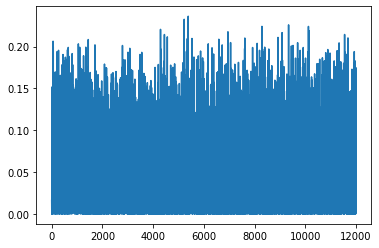

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26737308654124214 and MAE 0.49949827683694215 CC: 0.01294656855679104


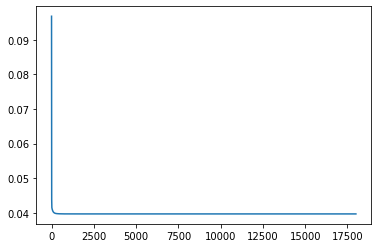

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


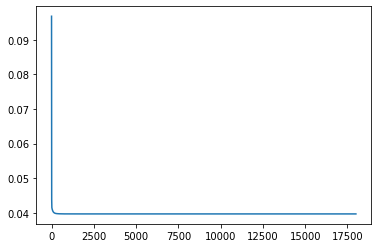

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


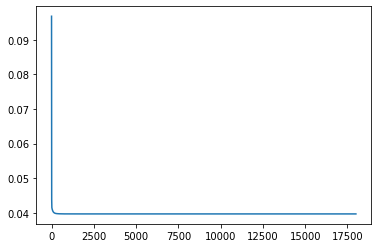

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611977991 and MAE 0.4992600413530008 CC: 0.03755826535906353


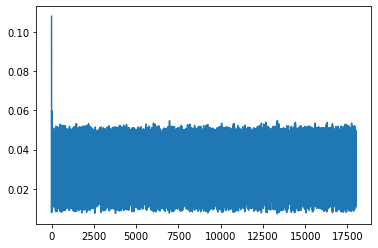

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2789023074171863 and MAE 0.49960660427454506 CC: 0.02235710026274174


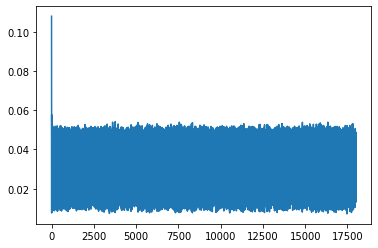

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27047261906998854 and MAE 0.4996855655714641 CC: 0.013069704264346524


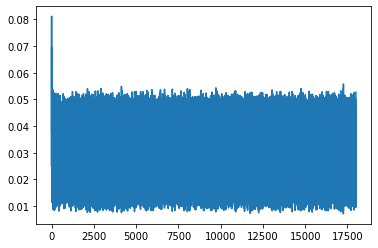

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2786316246211703 and MAE 0.49961075381423764 CC: 0.02219265203062235


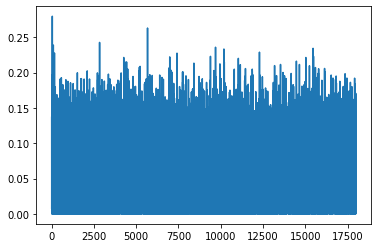

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2895505603034724 and MAE 0.49877366238041587 CC: 0.13039921955375067


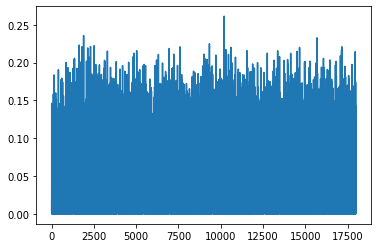

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2594884773346429 and MAE 0.4996320963788303 CC: 0.00703091080130599


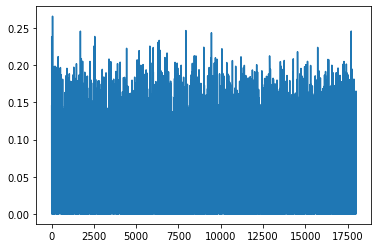

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2515362394674963 and MAE 0.4994847980927123 CC: 0.012529474547969656


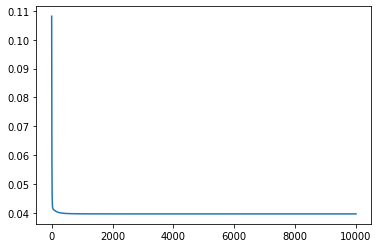

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


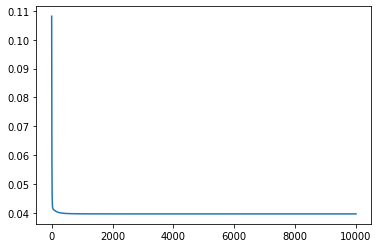

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


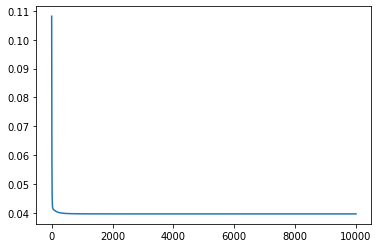

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


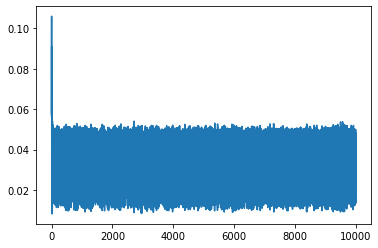

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27056274274838304 and MAE 0.4996930528930544 CC: 0.01198542039506353


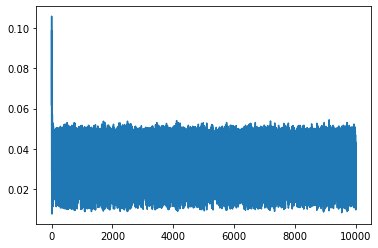

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2800694460370834 and MAE 0.49962525726894924 CC: 0.02154343089957163


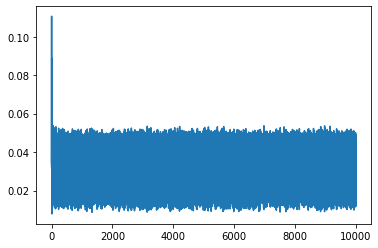

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27201159617704573 and MAE 0.4996677542059726 CC: 0.015077370938015713


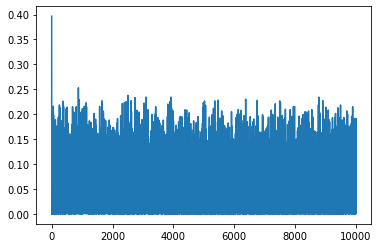

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.28198410123019235 and MAE 0.4993166134765075 CC: 0.048205904237927984


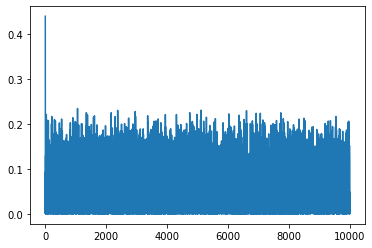

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25678790975166066 and MAE 0.4993468659245862 CC: 0.026773697889809978


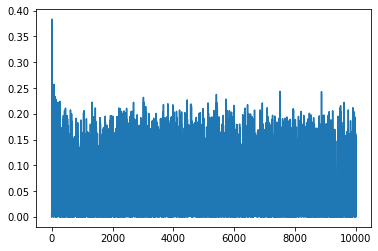

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2551636889756329 and MAE 0.49904303491306823 CC: 0.42405570239480683


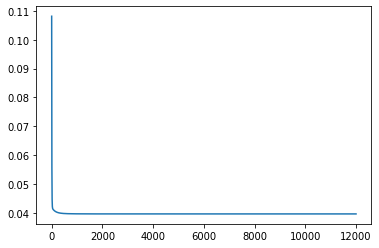

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


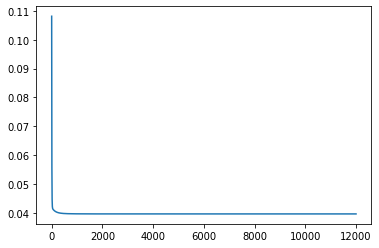

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


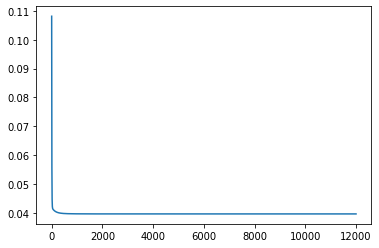

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


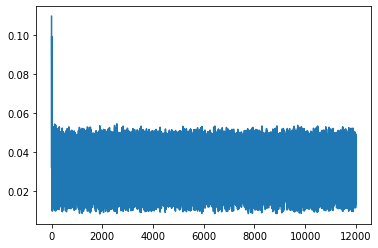

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27875178556517477 and MAE 0.49962882947078163 CC: 0.021307986282688728


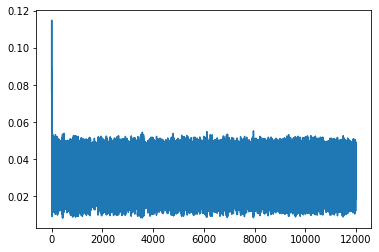

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2738235721274854 and MAE 0.4996606817571876 CC: 0.016293554256944006


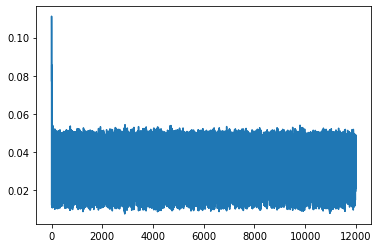

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2665043030766314 and MAE 0.49970421361985534 CC: 0.011040993433374977


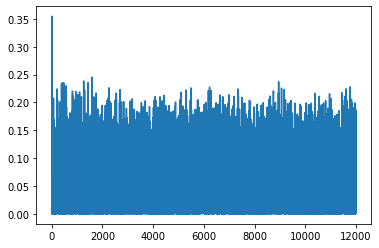

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.263150144204661 and MAE 0.49914829516115383 CC: 0.08153507874663274


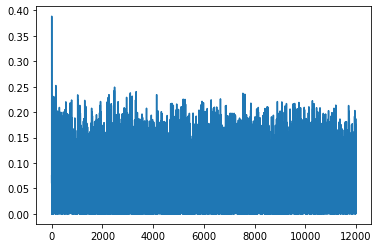

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2578299912861897 and MAE 0.4994605171731415 CC: 0.014515204018585698


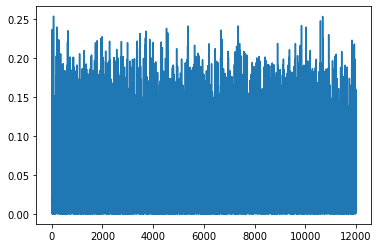

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2616663221930887 and MAE 0.4992563821966115 CC: 0.03873411881993703


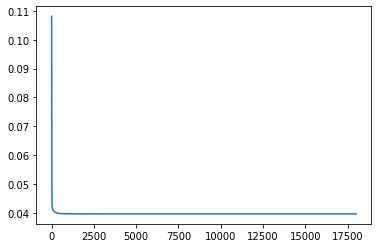

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


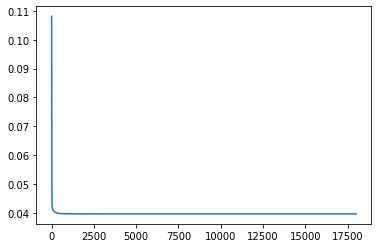

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


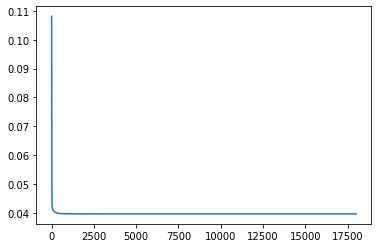

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


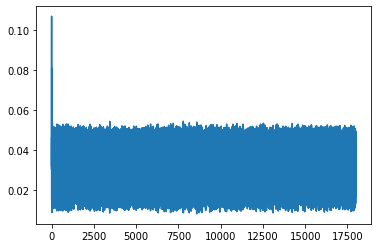

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2672674063590253 and MAE 0.4997147345107324 CC: 0.01028111735706919


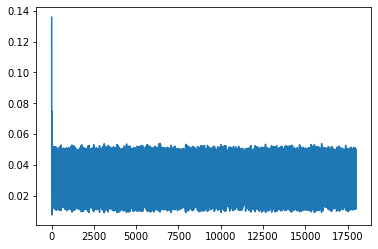

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2689419596457256 and MAE 0.49970237738213863 CC: 0.011886049650188933


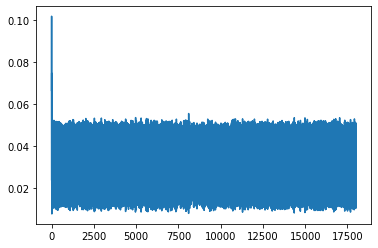

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27300578556706767 and MAE 0.49967318066398836 CC: 0.01425508371419992


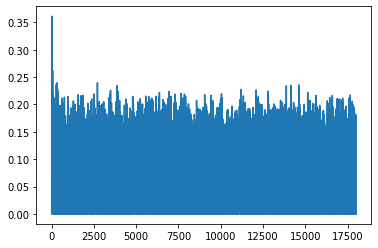

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2573701557634813 and MAE 0.499427722861595 CC: 0.019766487486685254


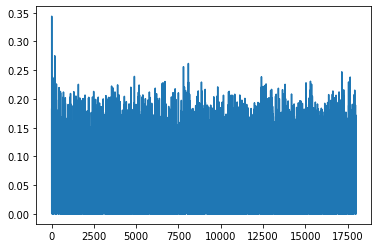

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2593171586225437 and MAE 0.4997578857880719 CC: 0.0038942606154276525


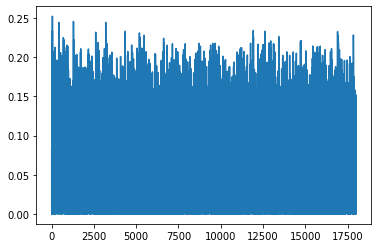

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25548427888964786 and MAE 0.4992172099453165 CC: 0.04378939881447924


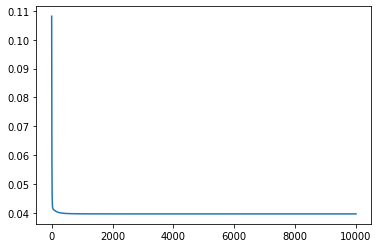

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


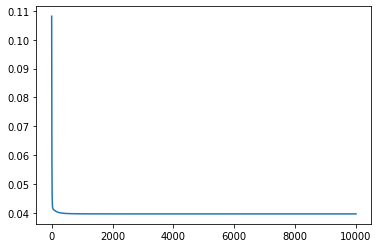

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


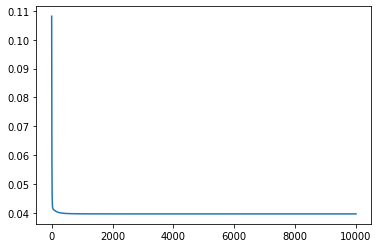

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


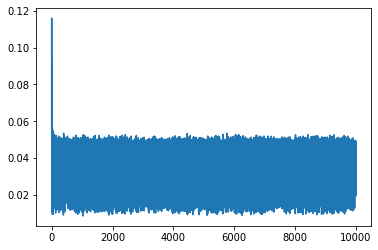

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2688015374033351 and MAE 0.4996865407917833 CC: 0.012960674709843757


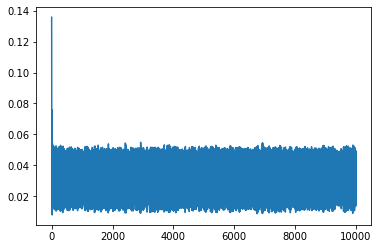

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2789679367074298 and MAE 0.499624867147639 CC: 0.022797380575593315


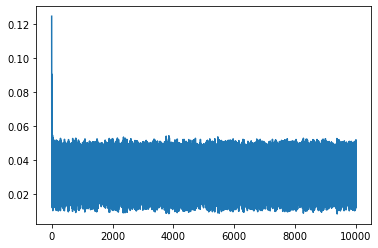

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27663698851239443 and MAE 0.4996329476641634 CC: 0.018994910657087114


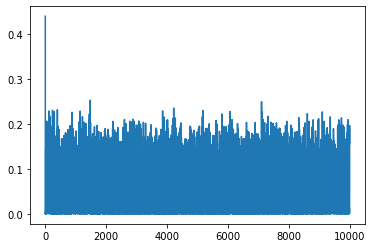

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2550250723302267 and MAE 0.4993008742658446 CC: 0.03911807920945464


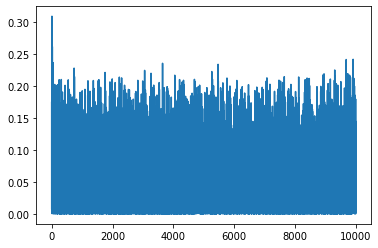

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.28524096848922253 and MAE 0.49917713951959064 CC: 0.20445569105605738


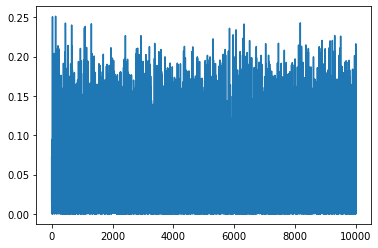

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.29003880654781466 and MAE 0.4990564685989079 CC: 0.5288150519029989


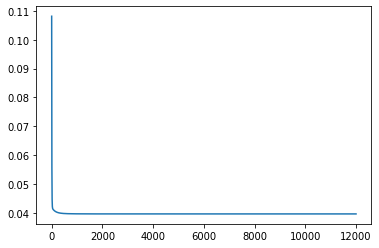

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


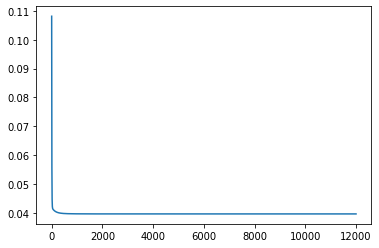

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


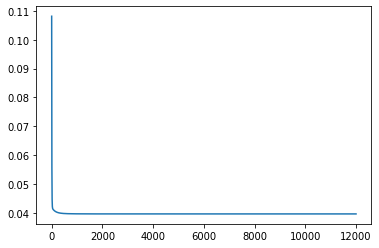

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


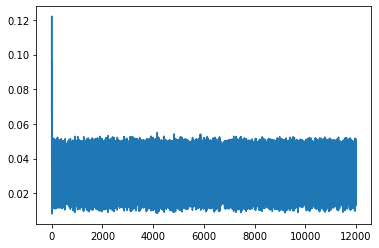

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27731650299769683 and MAE 0.49963951537017054 CC: 0.018865662547957053


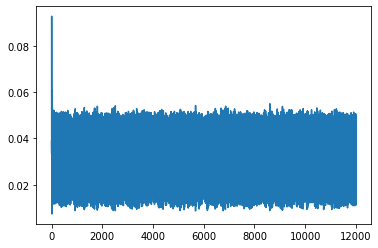

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.273614611080665 and MAE 0.49966554352897036 CC: 0.016221054851305546


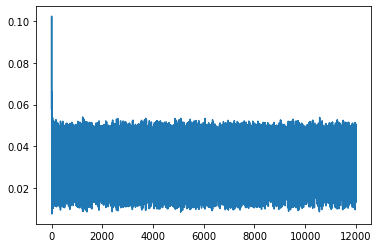

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27418099148356906 and MAE 0.4996507515047551 CC: 0.01773438755764215


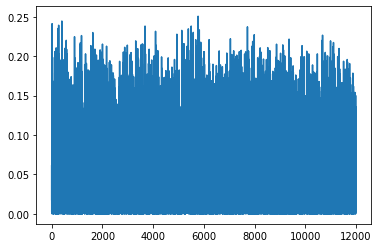

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2603797875980827 and MAE 0.4995902628301628 CC: 0.007864571319539014


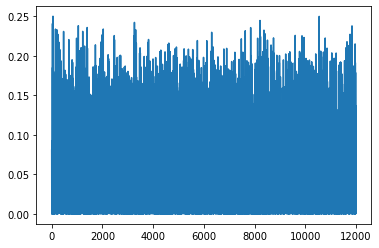

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.28175965595283026 and MAE 0.4994386781112013 CC: 0.016018011673101417


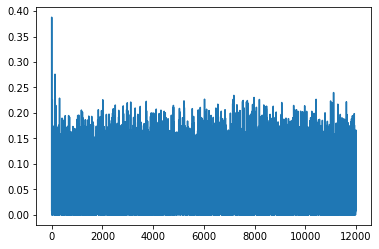

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.25940550812423085 and MAE 0.49994827049408264 CC: 0.0007424662093001124


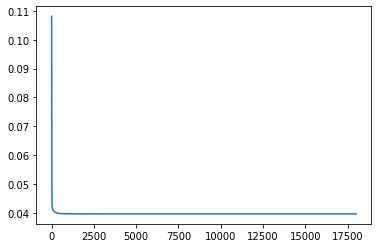

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


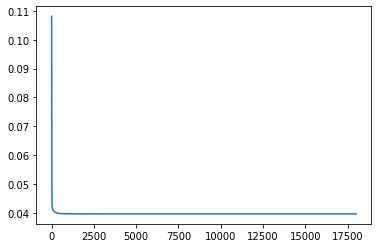

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


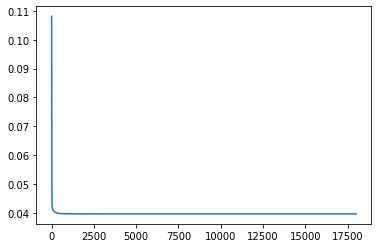

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


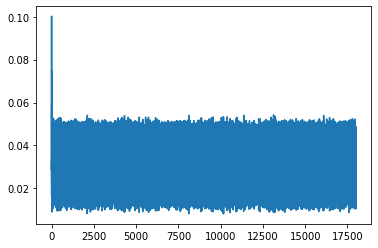

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2775080064234623 and MAE 0.49963130933935024 CC: 0.02137320652935264


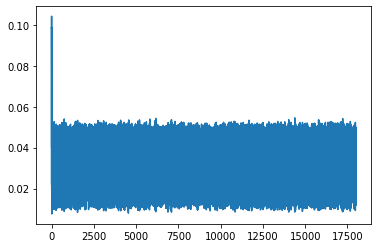

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26863486451629714 and MAE 0.49970041951124494 CC: 0.011211859933860945


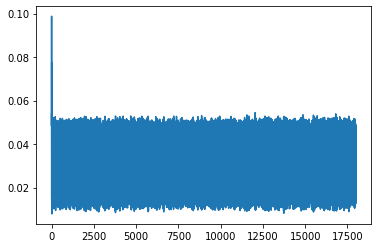

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26912379063280134 and MAE 0.4996963424885301 CC: 0.012570708034847923


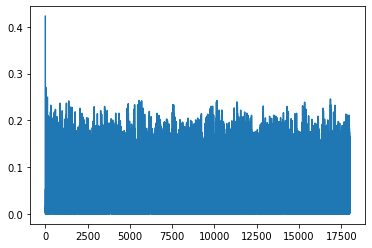

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26069856207514325 and MAE 0.4993771005108639 CC: 0.02518995403336195


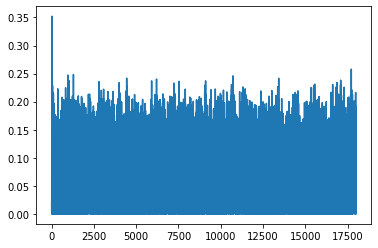

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2772937341405322 and MAE 0.49931790167941353 CC: 0.03995046120124994


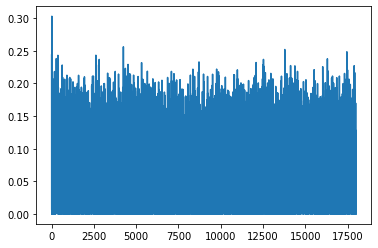

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.253467724274042 and MAE 0.49937311478157487 CC: 0.01938371438632699


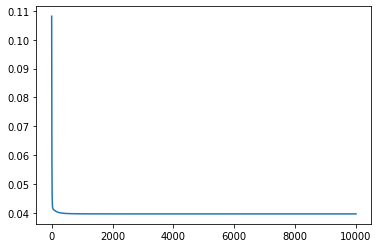

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


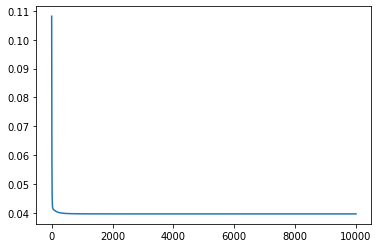

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


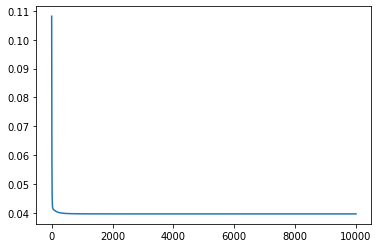

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.26241524785897113 and MAE 0.49926004582856853 CC: 0.03755813370797085


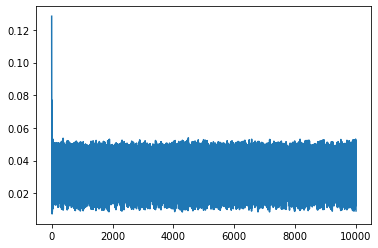

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.284774932460202 and MAE 0.49958979424538763 CC: 0.027781148609657504


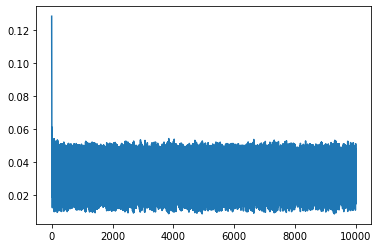

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27346504733278254 and MAE 0.49965880882246727 CC: 0.01619320823817723


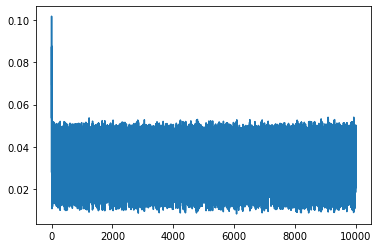

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26908103156203234 and MAE 0.49970870636891984 CC: 0.010406594575531967


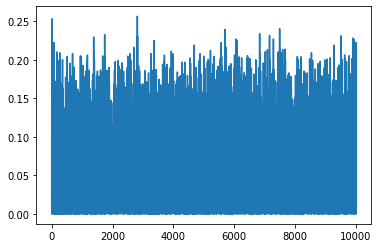

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.27691478554062776 and MAE 0.4997885033752743 CC: 0.0033869628574608743


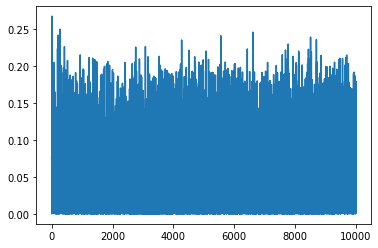

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2734430396611214 and MAE 0.49915826693647586 CC: 0.09440100902971753


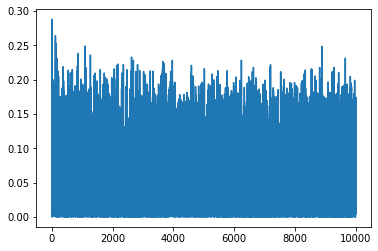

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26632021805067463 and MAE 0.4993186841296753 CC: 0.021572026286561095


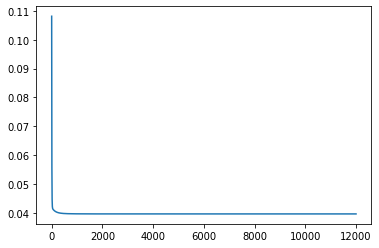

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


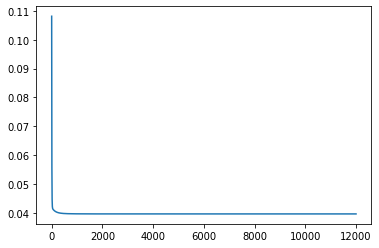

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


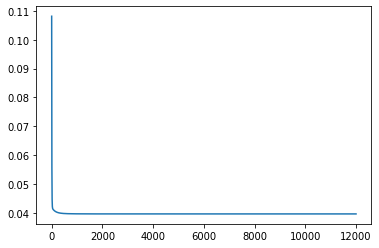

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152599638724 and MAE 0.4992600417670192 CC: 0.037558253180529654


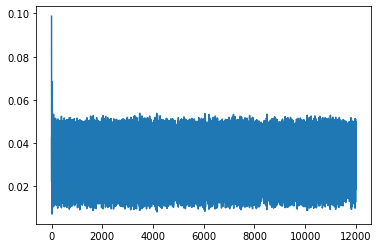

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.26856280483673434 and MAE 0.4997158233555211 CC: 0.010803237655043435


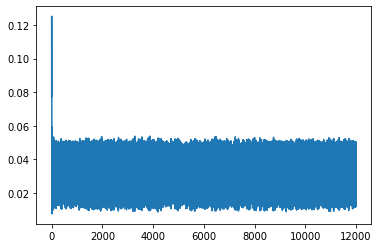

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2724230804986124 and MAE 0.4996668922382409 CC: 0.015514914186974324


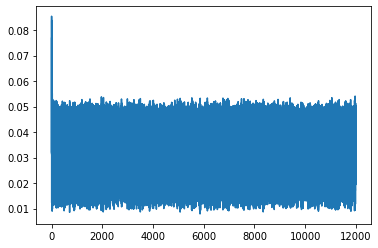

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2741448182915898 and MAE 0.49965157263068727 CC: 0.01710898402344414


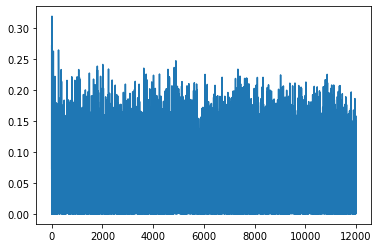

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2594205232986541 and MAE 0.4997649226966133 CC: 0.004160721344753672


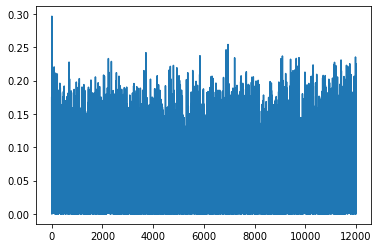

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.28476553322776416 and MAE 0.4996412514346312 CC: 0.010871196524741786


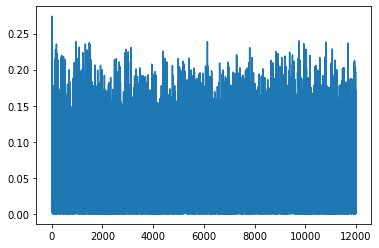

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26380218104894754 and MAE 0.49987117790750607 CC: 0.0017992639824635167


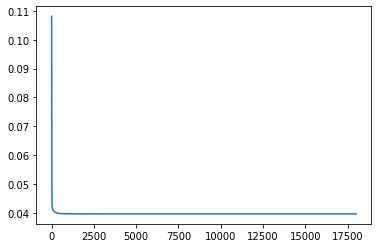

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


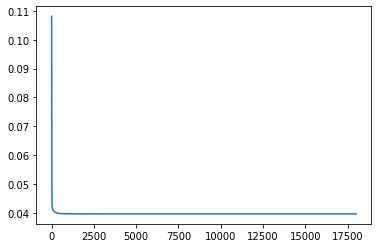

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


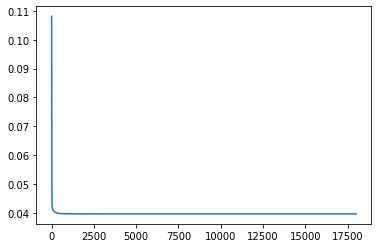

Batch: <function batch_gradient_descent at 0x7f7e4c78c7a0> 0.2624152611968225 and MAE 0.4992600413533285 CC: 0.03755826534942257


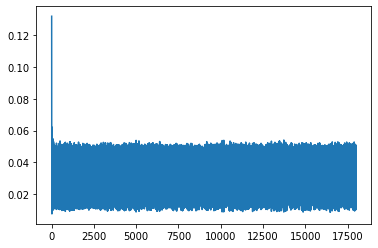

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.27553127621204904 and MAE 0.49965475916357355 CC: 0.016481846678785828


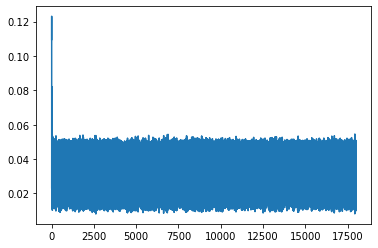

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2721778287814852 and MAE 0.4996638065515283 CC: 0.01542397267029809


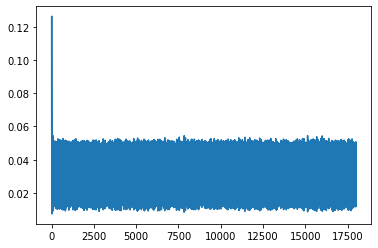

Batch: <function MB_gradient_descent at 0x7f7e4c78cef0> 0.2660454602926401 and MAE 0.49970886050650476 CC: 0.010600941542503023


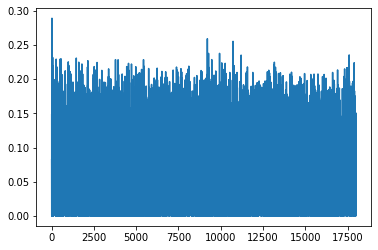

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.28023754845644205 and MAE 0.49904769006746097 CC: 0.18269029956865268


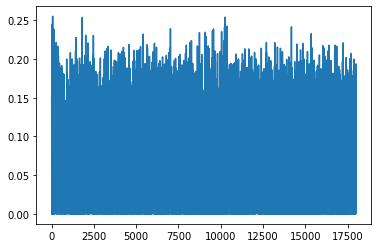

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.26313309976968313 and MAE 0.49951011631636427 CC: 0.012209488675675043


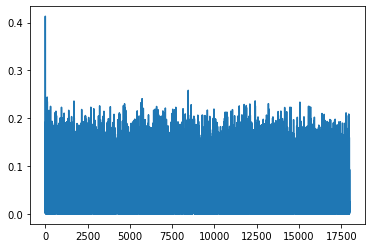

Batch: <function stochastic_gradient_descent at 0x7f7e62e5db90> 0.2604657378013955 and MAE 0.4990944032614415 CC: 0.22239275287250196


In [ ]:
# Implement Grid Search to find optimal parameters

alphas = [0.001,0.1,0.05]
lambs = [0.3,0.5,0.01]
iterationss = [10000,12000,18000]
batch_size = 40

for alpha in alphas:
  for lamb in lambs:
    for iters in iterationss:
      for algorithm in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
        for j in range(3): # 3 kinds of regularisation
          if j == 0: ## no regularisation
            lamb = 0
            if algorithm == MB_gradient_descent:
              calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb)
            else:
              calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb)
            plt.plot(range(iters),J_his)
            plt.show()
            pr = make_pred(calc_w)
            print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
          elif j == 1: ## l2 reg
            if algorithm == MB_gradient_descent:
              calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = True)
            else:
              calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = True)
            plt.plot(range(iters),J_his)
            plt.show()
            pr = make_pred(calc_w)
            print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
          else:
            if algorithm == MB_gradient_descent:
              calc_w,J_his = algorithm(X = X, y = y, w = w, alpha = alpha, iters = iters, batch_size = batch_size, lamb = lamb, l2 = False)
            else:
              calc_w,J_his = algorithm(X = X,y = y,w = w,alpha = alpha,iters = iters,lamb = lamb, l2 = False)
            plt.plot(range(iters),J_his)
            plt.show()
            pr = make_pred(calc_w)
            print("Batch: " + str(algorithm) + " " + str(meanSquareError(pr, y_test)) + " and MAE " + str(meanAbsoluteError(pr, y_test)) + " CC: " + str(CC(np.array([y_test]).T, np.array([pr]).T)[0][0]))
